# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from skimage.io import imread, imshow
from skimage import transform, img_as_float, filters
from skimage.color import rgb2gray
import glob
import math
from importlib import reload
import scipy

### Import the custom KaggleAmazonMain module

In [2]:
cwd = os.getcwd()
path = os.path.join(cwd, '..', 'src')
if not path in sys.path:
    sys.path.append(path)
del cwd, path

import KaggleAmazonMain

In [3]:
reload(KaggleAmazonMain)

<module 'KaggleAmazonMain' from 'C:\\Users\\ablin\\Documents\\Kaggle\\kaggle_UnderstandingAmazonFromSpace\\develop\\..\\src\\KaggleAmazonMain.py'>

# Load training image data

Load from pickle unless something has changed:

In [4]:
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

In [195]:
im_names = pickle.load('im_names.pkl', 'rb')
tagged_df = pd.read_pickle('tagged_df.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'im_names.pkl'

Below cell will recreate the feature matrix. Use with caution as this may take around 30 minutes to complete.

In [203]:
reload(KaggleAmazonMain)
X, y, im_names, tagged_df = KaggleAmazonMain.load_training_data(sampleOnly=False)
X.to_pickle('X.pkl')
y.to_pickle('y.pkl')

cwd C:\Users\ablin\Documents\Kaggle\kaggle_UnderstandingAmazonFromSpace\develop
Loading FULL jpg image dataset
number of files:  40479
processing 1000 of 40479
processing 2000 of 40479
processing 3000 of 40479
processing 4000 of 40479
processing 5000 of 40479
processing 6000 of 40479
processing 7000 of 40479
processing 8000 of 40479
processing 9000 of 40479
processing 10000 of 40479
processing 11000 of 40479
processing 12000 of 40479
processing 13000 of 40479
processing 14000 of 40479
processing 15000 of 40479
processing 16000 of 40479
processing 17000 of 40479
processing 18000 of 40479
processing 19000 of 40479
processing 20000 of 40479
processing 21000 of 40479
processing 22000 of 40479
processing 23000 of 40479
processing 24000 of 40479
processing 25000 of 40479
processing 26000 of 40479
processing 27000 of 40479
processing 28000 of 40479
processing 29000 of 40479
processing 30000 of 40479
processing 31000 of 40479
processing 32000 of 40479
processing 33000 of 40479
processing 34000

In [ ]:
import pickle
pickle.dump(im_names, open('im_names.pkl', "wb"))
tagged_df.to_pickle('tagged_df.pkl')

In [198]:
X.columns

Index(['b_bimodal', 'b_kurtosis', 'b_max', 'b_mean', 'b_min', 'b_skew',
       'b_std', 'g_bimodal', 'g_kurtosis', 'g_max', 'g_mean', 'g_min',
       'g_skew', 'g_std', 'r_bimodal', 'r_kurtosis', 'r_max', 'r_mean',
       'r_min', 'r_skew', 'r_std', 'sobel_colmean_std', 'sobel_kurtosis',
       'sobel_max', 'sobel_mean', 'sobel_min', 'sobel_rowmean_std',
       'sobel_skew', 'sobel_std'],
      dtype='object')

In [9]:
X_train.describe()

,b_bimodal,b_kurtosis,b_max,b_mean,b_min,b_skew,b_std,g_bimodal,g_kurtosis,g_max,...,r_skew,r_std,sobel_colmean_std,sobel_kurtosis,sobel_max,sobel_mean,sobel_min,sobel_rowmean_std,sobel_skew,sobel_std
count,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,...,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.0,40479.000000,40479.000000,40479.000000
mean,0.037349,4.591666,0.500522,0.298830,0.210140,0.926876,0.035437,0.045882,3.324470,0.553394,...,0.825220,0.053383,0.009467,6.670636,0.095850,0.013078,0.0,0.002241,1.657571,0.009467
std,0.069789,11.528801,0.194798,0.127996,0.124591,1.346190,0.034982,0.078006,9.388228,0.190678,...,1.282003,0.044307,0.004678,15.278270,0.054949,0.005722,0.0,0.001389,1.107029,0.004678
min,0.000000,-1.892600,0.098039,0.013848,0.000000,-8.595220,0.002449,0.000000,-1.904844,0.188235,...,-10.893046,0.002452,0.000343,-0.139698,0.003602,0.000085,0.0,0.000116,0.542032,0.000343
25%,0.010000,0.303400,0.337255,0.204952,0.121569,0.059571,0.015466,0.020000,0.141957,0.384314,...,0.056587,0.023491,0.006624,1.160826,0.060773,0.009292,0.0,0.001438,0.908794,0.006624
50%,0.020000,0.900927,0.466667,0.266938,0.180392,0.401520,0.021546,0.020000,0.629165,0.529412,...,0.402548,0.035303,0.009019,2.584881,0.083383,0.013254,0.0,0.001950,1.237125,0.009019
75%,0.030000,4.396050,0.631373,0.372502,0.274510,1.498954,0.041279,0.040000,2.993760,0.690196,...,1.403234,0.071083,0.011464,7.626368,0.120664,0.016603,0.0,0.002623,2.123407,0.011464
max,0.810000,555.288088,1.000000,0.957261,0.929412,19.972132,0.329120,0.780000,436.637585,1.000000,...,18.419069,0.317581,0.049561,1034.726575,0.546404,0.056375,0.0,0.017566,25.443085,0.049561


In [10]:
y_train

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
train_0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
train_1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
train_10,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
train_100,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
train_1000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
train_10000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
train_10001,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
train_10002,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
train_10003,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
train_10004,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [11]:
y_train.describe()

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
count,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000,40479.000000
mean,0.304800,0.008375,0.021221,0.008202,0.002495,0.696732,0.057561,0.002470,0.112330,0.090467,0.066578,0.179130,0.934806,0.199511,0.008399,0.005163,0.179402
std,0.460328,0.091131,0.144122,0.090193,0.051354,0.459676,0.232914,0.049642,0.321206,0.286853,0.249292,0.383466,0.246871,0.399638,0.091264,0.071670,0.383693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### See distribution of label counts. Note a significant imbalance.

In [12]:
#Barplot of tag counts
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)
print('There are {} unique tags in this data'.format(len(tagged_df.columns)))
colors = cm.rainbow(np.linspace(0, 1, len(tagged_df.columns)))
tagged_df.sum().sort_values(ascending=False).plot(title="Counts of Tags", color=colors, kind='bar')
plt.show()
tagged_df.sum().sort_values(ascending=False)

NameError: name 'tagged_df' is not defined

### Get a feel for the size and shape of the data

In [13]:
# n files, images are 256x256 pixels, with a channel dimension size 3 = RGB
print('X_train is a {} object'.format(type(X_train)))
print('it has shape {}'.format(X_train.shape))

X_train is a <class 'pandas.core.frame.DataFrame'> object
it has shape (40479, 29)


In [14]:
print('y_train is a {} object'.format(type(y_train)))
print('it has {} elements'.format(len(y_train)))

y_train is a <class 'pandas.core.frame.DataFrame'> object
it has 40479 elements


In [15]:
print('names_train is a {} object'.format(type(names_train)))
print('it has {} elements'.format(len(names_train)))
print('each element is of type {}'.format(type(names_train)))

NameError: name 'names_train' is not defined

# Exploratory plotting

## Plot some random images with their labels

In [16]:
KaggleAmazonMain.plot_samples(X_train, names_train, tagged_df, 4,4)

NameError: name 'names_train' is not defined

## Plot images with labels and their RGB intensity distributions

In [17]:
plt.subplots_adjust(wspace=0, hspace=0)
for i in range(0,3):
    sample = np.random.randint(low=0, high=X_train.shape[0]-1, size = 1)
    ind = names_train[sample[0]]
    tags = KaggleAmazonMain.get_labels(ind, tagged_df)
    KaggleAmazonMain.plot_rgb_dist(X_train[sample[0],:,:,:],tags)

NameError: name 'names_train' is not defined

## Plot sobels of some images with labels

In [18]:
X_train_g = rgb2gray(X_train)

X_train_sobel = []
for i in range(X_train_g.shape[0]):
    X_train_sobel.append(filters.sobel(X_train_g[i]))
X_train_sobel = np.asarray(X_train_sobel)

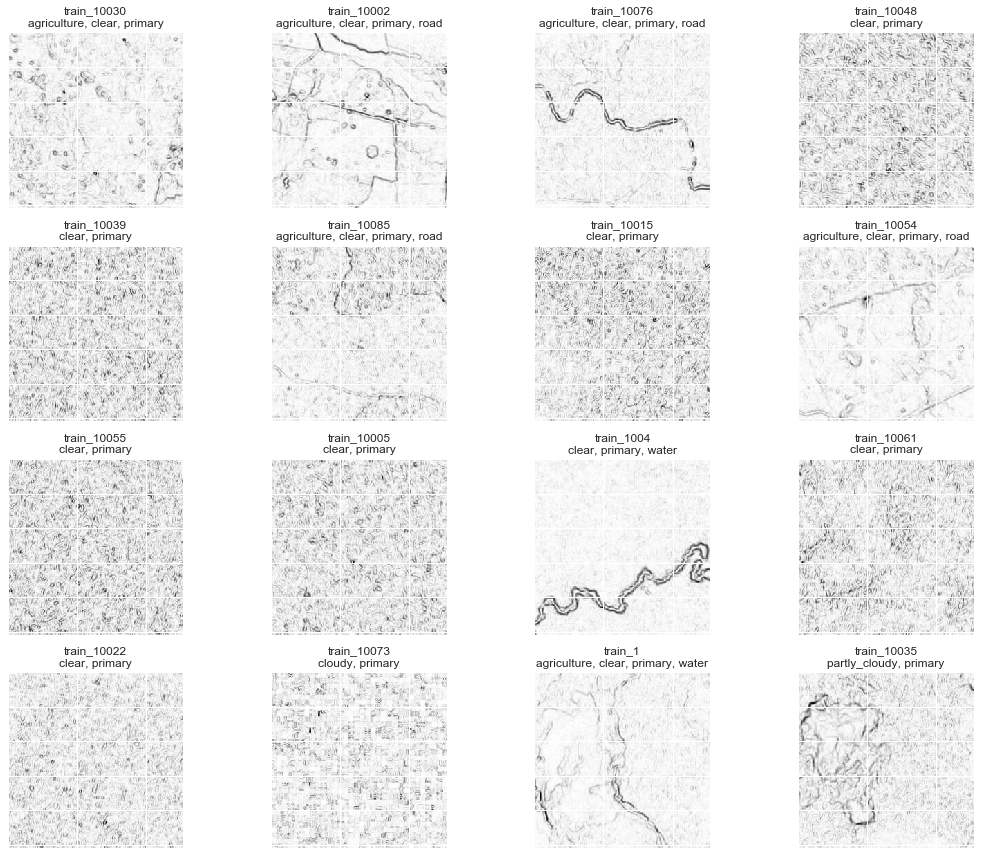

In [19]:
KaggleAmazonMain.plot_samples(X_train_sobel, names_train, tagged_df, 4,4)

# Canny 

In [152]:
sample_imgs, sample_imgs_labels, sample_imgs_names, tagged_df = KaggleAmazonMain.load_sample_training_data()

cwd C:\Users\ablin\Documents\Kaggle\kaggle_UnderstandingAmazonFromSpace\develop
Loading jpg image dataset


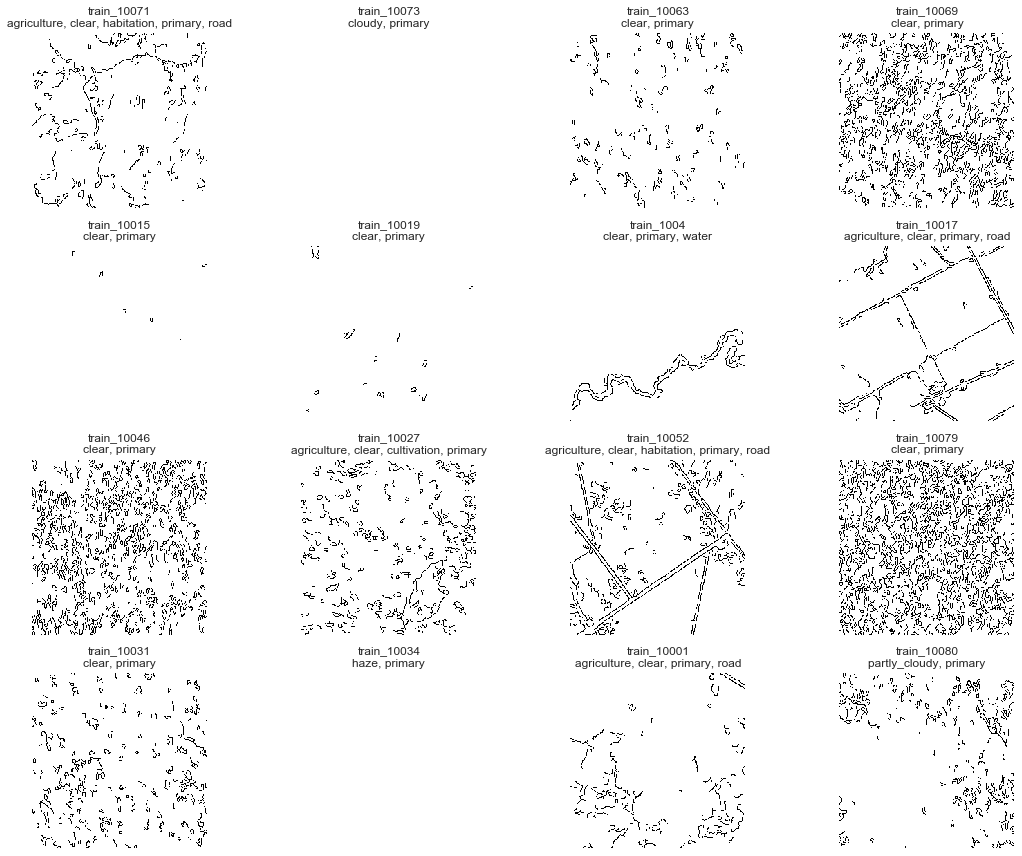

In [155]:
sample_imgs_canny = KaggleAmazonMain.xform_to_canny(sample_imgs, sigma=.5)

KaggleAmazonMain.plot_samples(sample_imgs_canny, sample_imgs_names, tagged_df, 4,4)

# Blob

In [157]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [169]:
type(sample_imgs)

numpy.ndarray

In [171]:
len(blob_log(rgb2gray(sample_imgs[4])))

2

# Hough line

In [181]:
from skimage.transform import (hough_line, probabilistic_hough_line, hough_line_peaks)

In [189]:
a,b,c = hough_line(rgb2gray(sample_imgs[5]))

e,f,g = hough_line_peaks(a,b,c)

print(len(e),len(f),len(g))

26 26 26


In [191]:
a.sum()

11796480

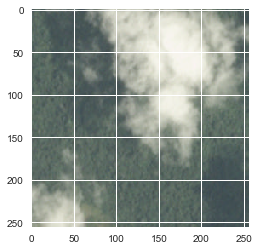

In [167]:
plt.imshow(sample_imgs[4])

# Develop predictive models

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

### Create test-train split

In [33]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.40, random_state=14113)

**need to fix this in the right place**. It is fixed in KaggleAmazonMain.py, but need to reload to update the pickle file

In [62]:
y_train[y_train > 1] = 1
y_validation[y_validation > 1] = 1

## Search random forest hyperparameter space 
- use GridSearchCV
- change score to the f2 score

In [38]:
f2_scorer_obj = make_scorer(fbeta_score, beta=2, average='samples')

rf = RandomForestClassifier(bootstrap = True, 
                            oob_score = False,
                            n_jobs = -1,
                            random_state = 14113
                            )

parameters = {
    'n_estimators' : [100, 200, 300],
    'max_features' : ['sqrt', 'log2', 1, 2, 0.5, None],
    'class_weight' : ['balanced', 'balanced_subsample']
}

grid_search_obj = GridSearchCV(rf, parameters, scoring=f2_score, n_jobs=-1, cv=3)

grid_search_obj.fit(X_train, y_train)

Pickle results for future use

In [57]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results.to_pickle('grid_search_results_df.pkl')

import pickle
pickle.dump(grid_search, open('grid_search_object.pkl', "wb"))

Load grid search results from pickle if needed in future

In [56]:
grid_search_results = pd.read_pickle('grid_search_results_df.pkl')

In [58]:
grid_search_obj = pickle.load(open('grid_search_object.pkl', "rb"))

### Print out grid search results

In [43]:
grid_search.best_score_

0.84110451942747666

In [44]:
grid_search.best_params_

{'class_weight': 'balanced', 'max_features': None, 'n_estimators': 300}

In [45]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=14113, verbose=0,
            warm_start=False)

### Predict on validation set using *best estimator* and calculate F2 score

In [60]:
predictions_best = grid_search.best_estimator_.predict(X_validation)

In [63]:
fbeta_score(np.asarray(y_validation), predictions_best, beta=2, average='samples')

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.84284706125506736

### Tinker with threshold

In [64]:
predict_probas_best = grid_search.best_estimator_.predict_proba(X_validation)

In [71]:
predict_probas_best[0].shape

(16192, 2)

In [129]:
def get_prediction_matrix(probs, threshold):
    """
    Input is a matrix of probabilities from sklearn, and a classification threshold
    Output is a binary matrix of predictions
    """
    
    # need to work with an n x #outcomes matrix where elements are probabilities of class 1
    if type(probs) is list:
        probs = restructure_probs_matrix(probs)
    
    return (probs > threshold).astype(int)

In [128]:
test=restructure_probs_matrix(predict_probas_best)
(test>0.3).astype(int)

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ..., 
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [130]:
get_prediction_matrix(predict_probas_best, 0.3)

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ..., 
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [116]:
def restructure_probs_matrix(probs):
    probs_r = probs[0][:,1]
    for arr in probs[1:]:
        probs_r = np.column_stack((probs_r,arr[:,1]))
    return probs_r

In [139]:
best_score = 0
best_thresh = 0
scores = []
thresh = np.arange(0, 0.6, 0.02)
for t in thresh:  # loop through possible threshold values
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30)
    y_train = np.asarray(y_train); y_validation = np.asarray(y_validation)
    y_train[y_train > 1] = 1; y_validation[y_validation > 1] = 1
    rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                criterion='gini', max_depth=None, max_features='sqrt',
                max_leaf_nodes=None, min_impurity_split=1e-07,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                oob_score=False, verbose=0,
                warm_start=False)
    rf.fit(X_train, y_train)
    probs = rf.predict_proba(X_validation)
    yhat = get_prediction_matrix(probs,t)
    #print(yhat.shape, y_validation.shape)
    score = fbeta_score(np.asarray(y_validation), yhat, beta=2, average='samples')
    if score > best_score:
        best_score = score
        best_thresh = t
    scores.append(score)
    print('threshold: {}\tscore: {}\tbest score: {}\n'.format(t,score,best_score))
print('\nbest score is: {} at a threshold of {}'.format(best_score, best_thresh))

threshold: 0.0	score: 0.6449416780428702	best score: 0.6449416780428702

threshold: 0.02	score: 0.7793931326962948	best score: 0.7793931326962948

threshold: 0.04	score: 0.8158033976714083	best score: 0.8158033976714083

threshold: 0.06	score: 0.8352225791853045	best score: 0.8352225791853045

threshold: 0.08	score: 0.8513223631133336	best score: 0.8513223631133336

threshold: 0.1	score: 0.8614939583780936	best score: 0.8614939583780936

threshold: 0.12	score: 0.8702209894162366	best score: 0.8702209894162366

threshold: 0.14	score: 0.8778127938599611	best score: 0.8778127938599611

threshold: 0.16	score: 0.88106333242106	best score: 0.88106333242106

threshold: 0.18	score: 0.8851110165592564	best score: 0.8851110165592564

threshold: 0.2	score: 0.8856643109100014	best score: 0.8856643109100014

threshold: 0.22	score: 0.8877043805339228	best score: 0.8877043805339228

threshold: 0.24	score: 0.8899276757319431	best score: 0.8899276757319431

threshold: 0.26	score: 0.8871167443853575	bes

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


threshold: 0.44	score: 0.8580839278838163	best score: 0.8899276757319431

threshold: 0.46	score: 0.8520909848199676	best score: 0.8899276757319431



C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


threshold: 0.48	score: 0.8441694620239178	best score: 0.8899276757319431



C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


threshold: 0.5	score: 0.838659733497323	best score: 0.8899276757319431



C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


threshold: 0.52	score: 0.8357604704542948	best score: 0.8899276757319431



C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


threshold: 0.54	score: 0.8262580304969667	best score: 0.8899276757319431



C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


threshold: 0.56	score: 0.8189223552351447	best score: 0.8899276757319431

threshold: 0.58	score: 0.8113681935045345	best score: 0.8899276757319431


best score is: 0.8899276757319431 at a threshold of 0.24


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


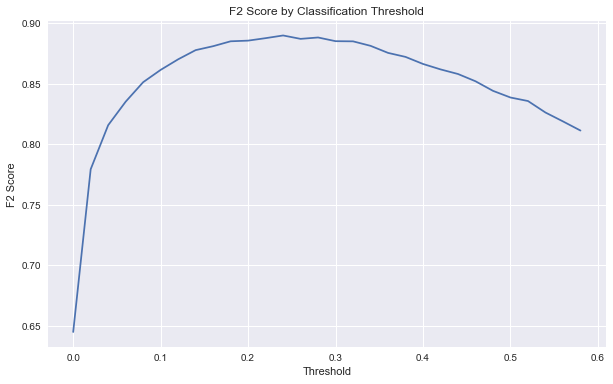

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(thresh, scores)
plt.title('F2 Score by Classification Threshold'); plt.xlabel('Threshold'); plt.ylabel('F2 Score')

In [103]:
def best_threshold(feature_index):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30)
    y_train = np.asarray(y_train); y_validation = np.asarray(y_validation)
    y_train[y_train > 1] = 1; y_validation[y_validation > 1] = 1
    rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                criterion='gini', max_depth=None, max_features='sqrt',
                max_leaf_nodes=None, min_impurity_split=1e-07,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                oob_score=False, verbose=0,
                warm_start=False)
    rf.fit(X_train, y_train)
    probs = np.asarray(rf.predict_proba(X_validation))
    predict = np.asarray(rf.predict(X_validation))

    best_score = 0
    best_thresh = 0
    thresh = np.arange(0.1, 0.6, 0.05)
    for t in thresh:  # loop through possible threshold values
        print('t:',t)
        for j in range(len(probs[feature_index])): # loop through data predictions
            if probs[feature_index][j,1] > t and probs[feature_index][j,1] < 0.5:
                #print('found a {}'.format(probs[feature_index][j,1]))
                predict[j,feature_index] = 1
        score = fbeta_score(np.asarray(y_validation), predict, beta=2, average='samples')
        print('score:',score)
        print('best score:', best_score)
        if score > best_score:
            best_score = score
            best_thresh = t
    print('best score is: {} at a threshold of {}'.format(best_score, best_thresh))
    return best_thresh, best_score

In [104]:
feature = 'blow_down'
feature_index = y_train.columns.get_loc(feature)
best_threshold(feature_index)

t: 0.1
score: 0.83881593204
best score: 0
t: 0.15
score: 0.83881593204
best score: 0.83881593204
t: 0.2
score: 0.83881593204
best score: 0.83881593204
t: 0.25
score: 0.83881593204
best score: 0.83881593204
t: 0.3
score: 0.83881593204
best score: 0.83881593204
t: 0.35
score: 0.83881593204
best score: 0.83881593204
t: 0.4
score: 0.83881593204
best score: 0.83881593204
t: 0.45


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


score: 0.83881593204
best score: 0.83881593204
t: 0.5
score: 0.83881593204
best score: 0.83881593204
t: 0.55
score: 0.83881593204
best score: 0.83881593204
best score is: 0.8388159320397407 at a threshold of 0.1


(0.10000000000000001, 0.8388159320397407)

In [105]:
thresholds = []
for i in range(len(y_train.columns)):
    thresholds.append(best_threshold(i))
thresholds

t: 0.1
score: 0.84281785701
best score: 0
t: 0.15
score: 0.84281785701
best score: 0.84281785701
t: 0.2
score: 0.84281785701
best score: 0.84281785701
t: 0.25
score: 0.84281785701
best score: 0.84281785701
t: 0.3
score: 0.84281785701
best score: 0.84281785701
t: 0.35
score: 0.84281785701
best score: 0.84281785701
t: 0.4


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


score: 0.84281785701
best score: 0.84281785701
t: 0.45
score: 0.84281785701
best score: 0.84281785701
t: 0.5
score: 0.84281785701
best score: 0.84281785701
t: 0.55
score: 0.84281785701
best score: 0.84281785701
best score is: 0.8428178570099182 at a threshold of 0.1
t: 0.1
score: 0.840754340708
best score: 0
t: 0.15
score: 0.840754340708
best score: 0.840754340708
t: 0.2
score: 0.840754340708
best score: 0.840754340708
t: 0.25
score: 0.840754340708
best score: 0.840754340708
t: 0.3
score: 0.840754340708
best score: 0.840754340708
t: 0.35
score: 0.840754340708
best score: 0.840754340708
t: 0.4


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


score: 0.840754340708
best score: 0.840754340708
t: 0.45
score: 0.840754340708
best score: 0.840754340708
t: 0.5
score: 0.840754340708
best score: 0.840754340708
t: 0.55
score: 0.840754340708
best score: 0.840754340708
best score is: 0.84075434070831 at a threshold of 0.1
t: 0.1
score: 0.840328510453
best score: 0
t: 0.15
score: 0.840328510453
best score: 0.840328510453
t: 0.2
score: 0.840328510453
best score: 0.840328510453
t: 0.25
score: 0.840328510453
best score: 0.840328510453
t: 0.3
score: 0.840328510453
best score: 0.840328510453
t: 0.35
score: 0.840328510453
best score: 0.840328510453
t: 0.4
score: 0.840328510453
best score: 0.840328510453
t: 0.45
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.840328510453
best score: 0.840328510453
t: 0.5
score: 0.840328510453
best score: 0.840328510453
t: 0.55
score: 0.840328510453
best score: 0.840328510453
best score is: 0.8403285104531885 at a threshold of 0.1
t: 0.1
score: 0.843559830723
best score: 0
t: 0.15
score: 0.843559830723
best score: 0.843559830723
t: 0.2
score: 0.843559830723
best score: 0.843559830723
t: 0.25
score: 0.843559830723
best score: 0.843559830723
t: 0.3
score: 0.843559830723
best score: 0.843559830723
t: 0.35
score: 0.843559830723
best score: 0.843559830723
t: 0.4
score: 0.843559830723
best score: 0.843559830723
t: 0.45
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.843559830723
best score: 0.843559830723
t: 0.5
score: 0.843559830723
best score: 0.843559830723
t: 0.55
score: 0.843559830723
best score: 0.843559830723
best score is: 0.8435598307234209 at a threshold of 0.1
t: 0.1
score: 0.840983314229
best score: 0
t: 0.15
score: 0.840983314229
best score: 0.840983314229
t: 0.2
score: 0.840983314229
best score: 0.840983314229
t: 0.25
score: 0.840983314229
best score: 0.840983314229
t: 0.3
score: 0.840983314229
best score: 0.840983314229
t: 0.35
score: 0.840983314229
best score: 0.840983314229
t: 0.4
score: 0.840983314229
best score: 0.840983314229
t: 0.45
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.840983314229
best score: 0.840983314229
t: 0.5
score: 0.840983314229
best score: 0.840983314229
t: 0.55
score: 0.840983314229
best score: 0.840983314229
best score is: 0.8409833142290626 at a threshold of 0.1
t: 0.1
score: 0.841022947207
best score: 0
t: 0.15
score: 0.841022947207
best score: 0.841022947207
t: 0.2
score: 0.841022947207
best score: 0.841022947207
t: 0.25
score: 0.841022947207
best score: 0.841022947207
t: 0.3
score: 0.841022947207
best score: 0.841022947207
t: 0.35
score: 0.841022947207
best score: 0.841022947207
t: 0.4
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.841022947207
best score: 0.841022947207
t: 0.45
score: 0.841022947207
best score: 0.841022947207
t: 0.5
score: 0.841022947207
best score: 0.841022947207
t: 0.55
score: 0.841022947207
best score: 0.841022947207
best score is: 0.8410229472069375 at a threshold of 0.1
t: 0.1
score: 0.843393783921
best score: 0
t: 0.15
score: 0.843393783921
best score: 0.843393783921
t: 0.2
score: 0.843393783921
best score: 0.843393783921
t: 0.25
score: 0.843393783921
best score: 0.843393783921
t: 0.3
score: 0.843393783921
best score: 0.843393783921
t: 0.35
score: 0.843393783921
best score: 0.843393783921
t: 0.4
score: 0.843393783921
best score: 0.843393783921
t: 0.45
score: 0.843393783921
best score: 0.843393783921
t: 0.5
score: 0.843393783921
best score: 0.843393783921
t: 0.55
score: 0.843393783921
best score: 0.843393783921
best score is: 0.8433937839208192 at a threshold of 0.1
t: 0.1
score: 0.842708234987
best score: 0
t: 0.15
score: 0.842708234987
best score: 0.842708234987
t: 0.2
score: 0.8427082

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.842708234987
best score: 0.842708234987
t: 0.5
score: 0.842708234987
best score: 0.842708234987
t: 0.55
score: 0.842708234987
best score: 0.842708234987
best score is: 0.8427082349873366 at a threshold of 0.1
t: 0.1
score: 0.841864969918
best score: 0
t: 0.15
score: 0.841864969918
best score: 0.841864969918
t: 0.2
score: 0.841864969918
best score: 0.841864969918
t: 0.25
score: 0.841864969918
best score: 0.841864969918
t: 0.3
score: 0.841864969918
best score: 0.841864969918
t: 0.35
score: 0.841864969918
best score: 0.841864969918
t: 0.4
score: 0.841864969918
best score: 0.841864969918
t: 0.45


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


score: 0.841864969918
best score: 0.841864969918
t: 0.5
score: 0.841864969918
best score: 0.841864969918
t: 0.55
score: 0.841864969918
best score: 0.841864969918
best score is: 0.8418649699176276 at a threshold of 0.1
t: 0.1
score: 0.840927203218
best score: 0
t: 0.15
score: 0.840927203218
best score: 0.840927203218
t: 0.2
score: 0.840927203218
best score: 0.840927203218
t: 0.25
score: 0.840927203218
best score: 0.840927203218
t: 0.3
score: 0.840927203218
best score: 0.840927203218
t: 0.35
score: 0.840927203218
best score: 0.840927203218
t: 0.4
score: 0.840927203218
best score: 0.840927203218
t: 0.45
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.840927203218
best score: 0.840927203218
t: 0.5
score: 0.840927203218
best score: 0.840927203218
t: 0.55
score: 0.840927203218
best score: 0.840927203218
best score is: 0.8409272032183424 at a threshold of 0.1
t: 0.1
score: 0.843843217953
best score: 0
t: 0.15
score: 0.843843217953
best score: 0.843843217953
t: 0.2
score: 0.843843217953
best score: 0.843843217953
t: 0.25
score: 0.843843217953
best score: 0.843843217953
t: 0.3
score: 0.843843217953
best score: 0.843843217953
t: 0.35
score: 0.843843217953
best score: 0.843843217953
t: 0.4
score: 0.843843217953
best score: 0.843843217953
t: 0.45
score: 0.843843217953
best score: 0.843843217953
t: 0.5


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


score: 0.843843217953
best score: 0.843843217953
t: 0.55
score: 0.843843217953
best score: 0.843843217953
best score is: 0.8438432179533961 at a threshold of 0.1
t: 0.1
score: 0.842554045832
best score: 0
t: 0.15
score: 0.842554045832
best score: 0.842554045832
t: 0.2
score: 0.842554045832
best score: 0.842554045832
t: 0.25
score: 0.842554045832
best score: 0.842554045832
t: 0.3
score: 0.842554045832
best score: 0.842554045832
t: 0.35
score: 0.842554045832
best score: 0.842554045832
t: 0.4
score: 0.842554045832
best score: 0.842554045832
t: 0.45


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


score: 0.842554045832
best score: 0.842554045832
t: 0.5
score: 0.842554045832
best score: 0.842554045832
t: 0.55
score: 0.842554045832
best score: 0.842554045832
best score is: 0.8425540458322743 at a threshold of 0.1
t: 0.1
score: 0.837044067013
best score: 0
t: 0.15
score: 0.837044067013
best score: 0.837044067013
t: 0.2
score: 0.837044067013
best score: 0.837044067013
t: 0.25
score: 0.837044067013
best score: 0.837044067013
t: 0.3
score: 0.837044067013
best score: 0.837044067013
t: 0.35
score: 0.837044067013
best score: 0.837044067013
t: 0.4
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.837044067013
best score: 0.837044067013
t: 0.45
score: 0.837044067013
best score: 0.837044067013
t: 0.5
score: 0.837044067013
best score: 0.837044067013
t: 0.55
score: 0.837044067013
best score: 0.837044067013
best score is: 0.8370440670128367 at a threshold of 0.1
t: 0.1
score: 0.843394083361
best score: 0
t: 0.15
score: 0.843394083361
best score: 0.843394083361
t: 0.2
score: 0.843394083361
best score: 0.843394083361
t: 0.25
score: 0.843394083361
best score: 0.843394083361
t: 0.3
score: 0.843394083361
best score: 0.843394083361
t: 0.35
score: 0.843394083361
best score: 0.843394083361
t: 0.4
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.843394083361
best score: 0.843394083361
t: 0.45
score: 0.843394083361
best score: 0.843394083361
t: 0.5
score: 0.843394083361
best score: 0.843394083361
t: 0.55
score: 0.843394083361
best score: 0.843394083361
best score is: 0.843394083361151 at a threshold of 0.1
t: 0.1
score: 0.837897024566
best score: 0
t: 0.15
score: 0.837897024566
best score: 0.837897024566
t: 0.2
score: 0.837897024566
best score: 0.837897024566
t: 0.25
score: 0.837897024566
best score: 0.837897024566
t: 0.3
score: 0.837897024566
best score: 0.837897024566
t: 0.35
score: 0.837897024566
best score: 0.837897024566
t: 0.4
score:

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


 0.837897024566
best score: 0.837897024566
t: 0.45
score: 0.837897024566
best score: 0.837897024566
t: 0.5
score: 0.837897024566
best score: 0.837897024566
t: 0.55
score: 0.837897024566
best score: 0.837897024566
best score is: 0.8378970245662531 at a threshold of 0.1
t: 0.1
score: 0.841811709285
best score: 0
t: 0.15
score: 0.841811709285
best score: 0.841811709285
t: 0.2
score: 0.841811709285
best score: 0.841811709285
t: 0.25
score: 0.841811709285
best score: 0.841811709285
t: 0.3
score: 0.841811709285
best score: 0.841811709285
t: 0.35
score: 0.841811709285
best score: 0.841811709285
t: 0.4
score: 0.841811709285
best score: 0.841811709285
t: 0.45
score: 0.841811709285
best score: 0.841811709285
t: 0.5


C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


score: 0.841811709285
best score: 0.841811709285
t: 0.55
score: 0.841811709285
best score: 0.841811709285
best score is: 0.8418117092846177 at a threshold of 0.1
t: 0.1
score: 0.845069505344
best score: 0
t: 0.15
score: 0.845069505344
best score: 0.845069505344
t: 0.2
score: 0.845069505344
best score: 0.845069505344
t: 0.25
score: 0.845069505344
best score: 0.845069505344
t: 0.3
score: 0.845069505344
best score: 0.845069505344
t: 0.35
score: 0.845069505344
best score: 0.845069505344
t: 0.4
score: 0.845069505344
best score: 0.845069505344
t: 0.45
score: 0.845069505344
best score: 0.845069505344
t: 0.5
score: 0.845069505344
best score: 0.845069505344
t: 0.55
score: 0.845069505344
best score: 0.845069505344
best score is: 0.8450695053437056 at a threshold of 0.1


[(0.10000000000000001, 0.84281785700991818),
 (0.10000000000000001, 0.84075434070831001),
 (0.10000000000000001, 0.84032851045318846),
 (0.10000000000000001, 0.84355983072342089),
 (0.10000000000000001, 0.84098331422906258),
 (0.10000000000000001, 0.84102294720693749),
 (0.10000000000000001, 0.84339378392081921),
 (0.10000000000000001, 0.8427082349873366),
 (0.10000000000000001, 0.8418649699176276),
 (0.10000000000000001, 0.84092720321834236),
 (0.10000000000000001, 0.84384321795339612),
 (0.10000000000000001, 0.84255404583227433),
 (0.10000000000000001, 0.83704406701283673),
 (0.10000000000000001, 0.84339408336115096),
 (0.10000000000000001, 0.83789702456625315),
 (0.10000000000000001, 0.84181170928461768),
 (0.10000000000000001, 0.84506950534370562)]

In [86]:
best_threshold(0)

best score is: 0.84161566378884 at a threshold of 0.1


(0.10000000000000001, 0.84161566378884001)

In [89]:
best_threshold(1)

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


best score is: 0.8392536464790405 at a threshold of 0.1


(0.10000000000000001, 0.83925364647904055)

In [88]:
y_train.sum()

agriculture           7351
artisinal_mine         199
bare_ground            504
blooming               199
blow_down               52
clear                16807
cloudy                1458
conventional_mine       56
cultivation           2679
habitation            2135
haze                  1577
partly_cloudy         4445
primary              22680
road                  4810
selective_logging      200
slash_burn             123
water                 4325
dtype: int64

In [77]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=14113, verbose=0,
            warm_start=False)

In [74]:
len(predict_probas_best[0]), len(predict_probas_best)

(16192, 17)

In [72]:
predictions_best.shape

(16192, 17)

## Fit, predict, and score using the final random forest

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

In [257]:
X_noSobel = X.drop(list(filter(lambda x: 'sobel' in x, list(X.columns))), axis=1)
X_noCanny = X.drop(list(filter(lambda x: 'canny' in x, list(X.columns))), axis=1)

In [224]:
X.drop(['hough_skew','hough_kurtosis'], axis=1, inplace=True)

In [220]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [258]:
X_train, X_validation, y_train, y_validation = train_test_split(X_noCanny, y, test_size=0.3, random_state=14113)

In [264]:
rf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=14113, verbose=0,
            warm_start=False)

In [265]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=14113, verbose=0,
            warm_start=False)

In [266]:
reload(KaggleAmazonMain)

<module 'KaggleAmazonMain' from 'C:\\Users\\ablin\\Documents\\Kaggle\\kaggle_UnderstandingAmazonFromSpace\\develop\\..\\src\\KaggleAmazonMain.py'>

In [267]:
probs = rf.predict_proba(X_validation)
predictions = KaggleAmazonMain.get_prediction_matrix(probs, 0.25)

score = fbeta_score(np.asarray(y_validation), predictions, beta=2, average='samples')

print('F2 score: ', score)

F2 score:  0.889521110063


In [234]:
fbeta_score(np.asarray(y_validation), rf.predict(X_validation), beta=2, average='samples')

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.83789521916766818

### there were 9 test observations which were given no predictions (labels)

In [99]:
zeros = pd.DataFrame(np.sum(predictions,axis=1))
sum(np.asarray(zeros) == 0)

array([9])

In [82]:
fbeta_score(np.asarray(y_validation), predictions, beta=2, average='samples')

C:\Users\ablin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.82752510409066693